# Etude des distributions de tailles d'avalanches en comparant le code actuel (algoA et algoB) au code d'Osvanny (algoOs)

## Conclusions actuelle:
- Il y a une différence de distribution entre le cas algoA et algoOs du fait que dans le premier cas on met à jour site par site dans un évènements alors que dans le second cas on met à jour tout le système en même temps dans un évènement (voir partie 1.6). Dans la littérature, il est dit qu'une des règles fondamentales des automates cellulaires est que tout le système doit être mis à jour en même temps pour que le système puisse êre déterministe (automate cellulaire synchrone). Sinon l'évolution va dépendre de la façon de mettre à jour les sites (automate cellulaire asynchrone), i.e si on fait la mise à jour des sites en balayant le tableau en x et en y l'évolution sera différente de si on balaye le tableau en y et en x. Je montre dans la partie 1.8 que la différence de distribution entre le cas synchrone et asynchrone reste dans la déviation standard obtenu avec les différentes réalisations de algoA. Cependant, il est possible que la synchronicité est une influence sur les paternes que peut former le système lors de son évolution ( voir Influence du régime transitoire sur la distribution des tailles d'avalanches).
- Il y a aussi une différence dans la distribution entre le cas algoA et algoB. Le fait que l'on parcourt le système différement change l'ordre de toppling des sites ce qui peut changer les tailles d'avalanches. Je pense que si la mise à jour des sites se fait comme dans algoOs la différence devrait disparaitre.

# Conclusion après mise à jour du code en mode sychrone:

- Il n'y a plus de différence dans la taille des 1000 premières avalanches entre algoA, algoB, et algoOs.

### Quelques mots sur les façons de mettre à jour  les sites lors d'une avalanche.

Il y a plusieurs façons de mettre les sites à jour,  les principaux sont:
- Parallèle: Tout les sites sont mises à jour en même temps (algoOs).
- Sequenciel: Quand le premier site à topple est trouvé pendant le parcours du système, la recherche des prochains sites à topple recommence du début du système (algoA)
- Pseudo-Sequenciel: Quand le premier site à topple est trouvé pendant le parcours des sites, la recherche des prochains sites à topple continue sur le même parcours du système (on reparcourt le système qu'une fois le premier parcours terminé).

Dans le cas Parallèle et Pseudo-Sequenciel, l'état du système après que tout les sites aient retrouvé leur stabilité est la même. Seulement le cas Pseudo-Sequenciel va prendre plus de temps. Dans le cas Sequenciel, l'état du système sera différent des deux autres. De plus comme le système est non abélian, le sens de parcours du système dans ce cas aura une influence sur les avalanches.

Source: Sequential updates for non-abelian SOC models S.T.R. Pinho & C.P.C. Prado 


## Les résultats des simulations obtenus avec algoOs sont ils identiques aux résultats obtenus avec algoA?

Les paramétres initiaux des deux codes sont identiques: 
- On initialise les threshold de force à 1 pour tout les sites 
- On initialise une valeur aléatoire de force entre 0 et 1 pour tout les sites 
- La largeur du système est de L=316
- Le système est à deux dimensions
- Le nombre d'event est de 1e7
- Les dissipations étudiées seront nu = 0.0, 0.012, 0.04, 0.12, 0.44


In [2]:
def avg(tabbin, nalpha, nbfile, nbins):
    nbdisip=int(nalpha/nbfile)
    xmoy=np.zeros((nbdisip,nbins))
    ymoy=np.zeros((nbdisip,nbins))

    x=0
    for i in range(nalpha):
        if (x== nbdisip):
            x=0
        for j in range(nbins):
            xmoy[x,j]+=tabbin[i, j, 0]/nbfile
            ymoy[x,j]+=tabbin[i, j, 1]/nbfile     
            
        x+=1
        
    return (xmoy, ymoy)


def stdev (tabbin, nalpha, nbfile, nbins, xtabmoy, ytabmoy):
    nbdisip=nalpha//nbfile
    xstddev=np.zeros((nbdisip,nbins))
    ystddev=np.zeros((nbdisip,nbins))
    
    x=0

    for i in range(nalpha):
        if (x== nbdisip):
            x=0
        for j in range(nbins):
            xstddev[x,j]+=(tabbin[i,j,0]-xtabmoy[x,j])**2
            ystddev[x,j]+=(tabbin[i,j,1]-ytabmoy[x,j])**2
        x+=1
        

    xstddev=(xstddev/nbfile)**(1/2)
    ystddev=(ystddev/nbfile)**(1/2)
    
    return (xstddev, ystddev)

def coorno(n):
    x1=n%L
    x2=n//L
    return (x1, x2)

In [1]:
from pathlib import Path
import os
from mainfct import mainfct
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut'

In [32]:
alpha=[14,22,24,247,25, 14,22,24,247,25] #dissipation for each datafile
ncifras=[100,100,100,1000,100, 100,100,100,1000,100] #to put in fraction
dim=[2]*10  # Dimension of the sys for each datafile 
nbins=12  #nb of points for the fit
lenghtTab=20*317**2 
nbfile=2 #nb of different data

a='{}/L316/Distribution_0{}'
b='/AvalancheA_output.txt'
a2='{}/Datastage/resultsG{}'
b2='/dist_ava_sites.dat'

filetab=[]
casetab=[]
for i in range(len(alpha)):
    if (i<5):
        filetab.append(a.format(brutpath, alpha[i])+b)
        casetab.append(0)
    elif(i>=5):
        filetab.append(a2.format(brutpath, alpha[i])+b2)
        casetab.append(1)

In [33]:
ndatafit, ndistloglog, disip, nstat, d1=mainfct(alpha, ncifras, dim, lenghtTab, filetab , casetab, nbfile, nbins)
print("mainfct done")

mainfct done


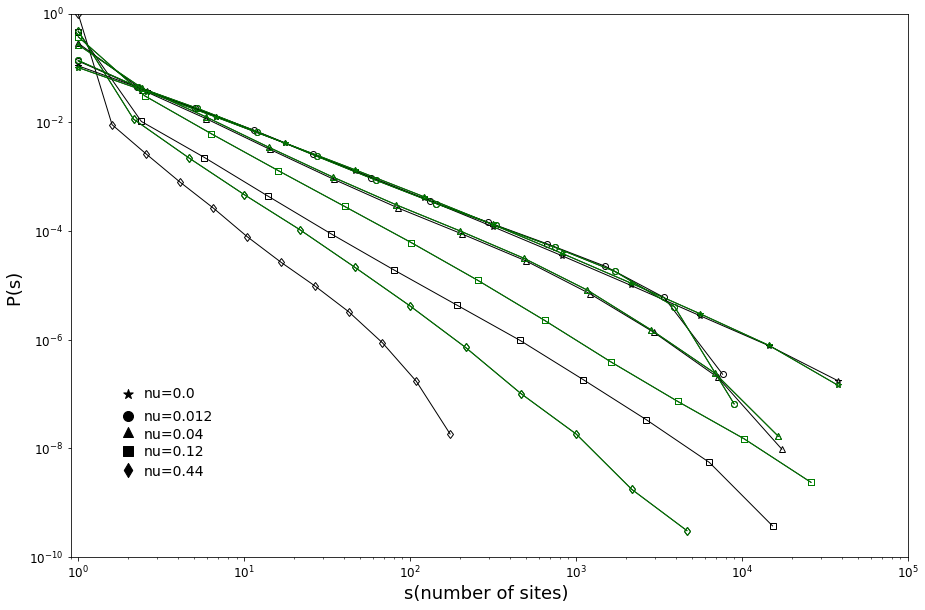

In [89]:

nalpha=len(alpha)

fig=plt.figure(figsize=(15,10))

spec = gridspec.GridSpec(ncols=1, nrows=1)

ax1=fig.add_subplot(spec[0])

s0=1
markers1=['d','s','^','o','*','d','s','^','o','*'];

for j in range(nalpha): 
    
    symbols1=markers1[j]+'k-'
    ax1.plot(10**ndistloglog[j,:,0],10**ndistloglog[j,:,1],symbols1,linewidth=1,markersize=6,mec="k", mfc="none") 
    if j>4:
        symbols1=markers1[j]+'g-'
        ax1.plot(10**ndistloglog[j,:,0],10**ndistloglog[j,:,1],symbols1,linewidth=1,markersize=6,mec="g", mfc="none") 
    #ax1.plot(10ndatafit[j,:,0],ndatafit[j,:,1],'r-',linewidth=0.5)
    

ax1.scatter(2,10**-7,s=100, marker= "*", color ="k")
ax1.text(2.5,8.5*10**-8, 'nu=0.0', fontsize=14)
ax1.scatter(2,4*10**-8,s=100, marker= "o", color ="k")
ax1.text(2.5,3.2*10**-8, 'nu=0.012', fontsize=14)
ax1.scatter(2,2*10**-8,s=100, marker= "^", color ="k")
ax1.text(2.5,1.5*10**-8, 'nu=0.04', fontsize=14)
ax1.scatter(2,9*10**-9,s=100, marker= "s", color ="k")
ax1.text(2.5,7.5*10**-9, 'nu=0.12', fontsize=14)
ax1.scatter(2,4*10**-9,s=100, marker= "d", color ="k")
ax1.text(2.5,3.2*10**-9, 'nu=0.44', fontsize=14)


    
ax1.axis([9*10**-1, 10**5, 10**-10, 1])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel('s(number of sites) ', fontsize=18)
ax1.set_ylabel('P(s) ', fontsize=18)
ax1.tick_params(labelsize=12) 

"""
nstaterror=np.zeros((4,nalpha))
ax2=fig.add_subplot(1,2,2)
s1=20

for i in range(nalpha):
    if (i<5):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='k',marker='o')
    else:
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='g',marker='o')
        
ax2.axis([-1, 51, 1.0, 3])
ax2.set_xlabel('Dissipation(%)', fontsize=15, )
ax2.set_ylabel('b', fontsize=15)
ax2.tick_params(labelsize=14)
ax2.grid(True)
"""
plt.show()

(courbe verte: données algoOs, courbe noire: données algoA)

- On a une différence de distribution qui apparait à basse dissipation

## AlgoA et algoB donnent-t-elles les mêmes distributions?
(On utilise les mêmes valeurs d'initialisation des sites pour les deux types d'avalanches)

In [92]:
nbfile=2 #nb of different data
nbins=12  #nb of points for the fit
lenghtTab=20*317**2 

alpha=[14,22,24,247,25]*nbfile #dissipation for each datafile
ncifras=[100,100,100,1000,100]*nbfile #to put in fraction
dim=[2]*10  # Dimension of the sys for each datafile 

nalpha=len(alpha)
nbdisip=int(nalpha/nbfile)

a='{}/Relaxation/Re1{}'
b='/AvalancheA_output.txt'
b2='/AvalancheB_output.txt'

filetab=[]
casetab=[]
for i in range(nalpha):
    if (i<nbdisip):
        filetab.append(a.format(brutpath, i+6)+b)
        casetab.append(0)
    elif(i>=nbdisip):
        filetab.append(a.format(brutpath, i+1)+b2)
        casetab.append(0)


In [93]:
ndatafit, ndistloglog, disip, nstat, d1=mainfct(alpha, ncifras, dim, lenghtTab, filetab , casetab, nbfile, nbins)
print("mainfct done")

mainfct done


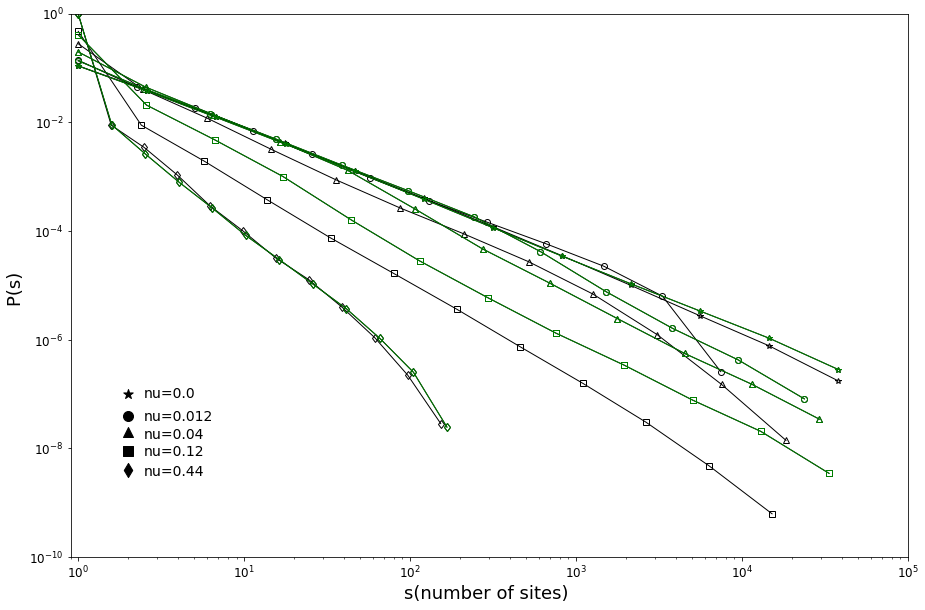

In [94]:
fig=plt.figure(figsize=(15,10))

spec = gridspec.GridSpec(ncols=1, nrows=1)

ax1=fig.add_subplot(spec[0])

s0=1
markers1=['d','s','^','o','*','d','s','^','o','*'];

for j in range(nalpha): 
    
    symbols1=markers1[j]+'k-'
    ax1.plot(10**ndistloglog[j,:,0],10**ndistloglog[j,:,1],symbols1,linewidth=1,markersize=6,mec="k", mfc="none") 
    if j>4:
        symbols1=markers1[j]+'g-'
        ax1.plot(10**ndistloglog[j,:,0],10**ndistloglog[j,:,1],symbols1,linewidth=1,markersize=6,mec="g", mfc="none") 
    #ax1.plot(10ndatafit[j,:,0],ndatafit[j,:,1],'r-',linewidth=0.5)
    

ax1.scatter(2,10**-7,s=100, marker= "*", color ="k")
ax1.text(2.5,8.5*10**-8, 'nu=0.0', fontsize=14)
ax1.scatter(2,4*10**-8,s=100, marker= "o", color ="k")
ax1.text(2.5,3.2*10**-8, 'nu=0.012', fontsize=14)
ax1.scatter(2,2*10**-8,s=100, marker= "^", color ="k")
ax1.text(2.5,1.5*10**-8, 'nu=0.04', fontsize=14)
ax1.scatter(2,9*10**-9,s=100, marker= "s", color ="k")
ax1.text(2.5,7.5*10**-9, 'nu=0.12', fontsize=14)
ax1.scatter(2,4*10**-9,s=100, marker= "d", color ="k")
ax1.text(2.5,3.2*10**-9, 'nu=0.44', fontsize=14)


    
ax1.axis([9*10**-1, 10**5, 10**-10, 1])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel('s(number of sites) ', fontsize=18)
ax1.set_ylabel('P(s) ', fontsize=18)
ax1.tick_params(labelsize=12) 


"""
ax2=fig.add_subplot(1,2,2)
s1=20

for i in range(nalpha):
    if (i<5):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='k',marker='o')
    else:
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='g',marker='o')
        
ax2.axis([-1, 51, 1.0, 3])
ax2.set_xlabel('Dissipation(%)', fontsize=15, )
ax2.set_ylabel('b', fontsize=15)
ax2.tick_params(labelsize=14)
ax2.grid(True)
"""
plt.show()

(courbe verte: données algoB, courbe noire: données algoA)


- Les distributions dans les deux cas ne sont pas identiques.
- La différence est la même que entre algoA et algoOs. L'ordre des toppling dans une avalanche n'est pas le même entre les deux cas.

## Avec la même initialisation a-t-on la même 1000eme avalanche ?

In [9]:
datafile=f"{brutpath}/Comparaison/Co41"
init=f"{datafile}/init_output"
end=f"{datafile}/end_output"
L=316



inittab=np.zeros((3, L*L))
endtab=np.zeros((3, L*L))

name=["A", "B", "Osvanny"]
nametab=np.array(name)
x=0
for term in nametab:
    f=open(f"{init}{term}.txt")
    f2=open(f"{end}{term}.txt")
    j=0
    for line in f :
        inittab[x][j]=line
        j+=1
    j=0
    for line in f2:
        endtab[x][j]=line
        j+=1
    x+=1

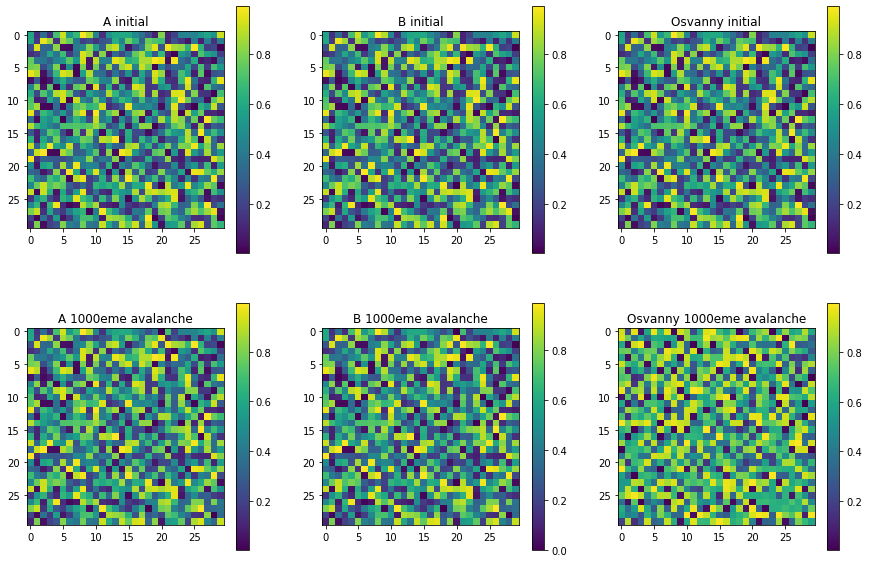

In [10]:
sysinit=np.zeros((3,L,L))
sysend=np.zeros((3,L,L))
for i in range (3):
    for n in range (L*L):
        x1, x2=coorno(n)
        sysinit[i][x1][x2]=inittab[i][n]
        sysend[i][x1][x2]=endtab[i][n]

plt.figure(figsize=(15,10))        

for i in range(6):
    plt.subplot(2,3,i+1)
    if (i < 3):
        
        sysinitsub=sysinit[i][130:160,130:160]
        plt.imshow(sysinitsub)
        plt.title(f"{nametab[i]} initial")
        plt.colorbar()
    if (i >= 3):
        sysendsub=sysend[i-3][130:160,130:160]
        plt.imshow(sysendsub)
        plt.title(f"{nametab[i-3]} 1000eme avalanche")
        plt.colorbar()

- L'initialisation est bien la même dans chaque cas ( ici j'ai pris qu'une portion de tout le système pour que les modifications soient plus visible.
- A la 1000ème avalanche les modifications dans le cas A et B sont très faible entre le système initiale et finale, alors qu'il y a une claire différence entre le système initial et l'état du système après la 1000ème avalanche dans le cas algoOs
- Il semble que l'état final est le même dans les cas A et B mais en réalité, il y a de petites variations ( voir ci-dessous)

In [11]:
print(sysend[0][40,140:150]) #Avalanche A
print(sysend[1][40,140:150]) #Avalanche B
print(sysend[2][40,140:150]) #Avalanche Osvanny

[0.856671 0.770001 0.985493 0.700001 0.894422 0.730952 0.004661 0.289522
 0.729418 0.523993]
[0.846215 0.759545 0.979357 0.706825 0.953086 0.720496 0.       0.284862
 0.718962 0.513537]
[0.616816 0.62658  0.312607 0.902454 0.0114   0.609461 0.957306 0.331637
 0.604935 0.867207]


- J'ai trouvé dans algoOs un arrondi sur le delta force que j'ai enlevé.
- Même sans l'arrondi, il y a des différences

In [12]:
inittab=np.zeros((3, L*L))
endtab=np.zeros((3, L*L))

name=["A", "B", "Osvanny2"]
nametab=np.array(name)

i=0
for term in nametab:
    f=open(f"{init}{term}.txt")
    f2=open(f"{end}{term}.txt")
    j=0
    for line in f :
        inittab[i][j]=line
        j+=1
    j=0
    for line in f2:
        endtab[i][j]=line
        j+=1
    i+=1

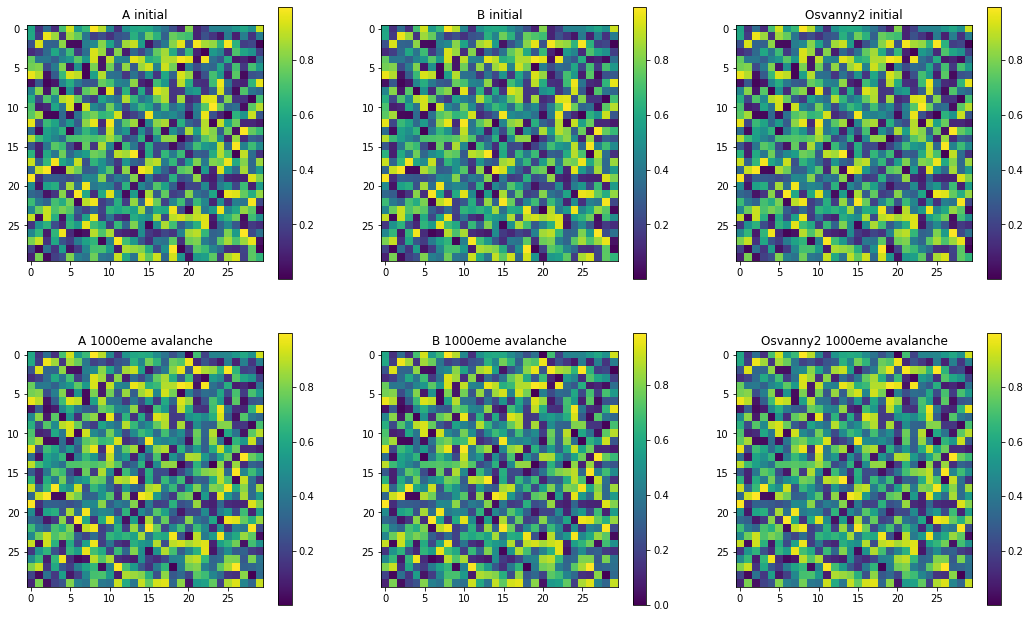

In [13]:
sysinit=np.zeros((3,L,L))
sysend=np.zeros((3,L,L))
for i in range (3):
    for n in range (L*L):
        x1, x2=coorno(n)
        sysinit[i][x1][x2]=inittab[i][n]
        sysend[i][x1][x2]=endtab[i][n]

plt.figure(figsize=(18,11))        

for i in range(6):
    plt.subplot(2,3,i+1)
    if (i < 3):
        
        sysinitsub=sysinit[i][130:160,130:160]
        plt.imshow(sysinitsub)
        plt.title(f"{nametab[i]} initial")
        plt.colorbar()
    if (i >= 3):
        sysendsub=sysend[i-3][130:160,130:160]
        plt.imshow(sysendsub)
        plt.title(f"{nametab[i-3]} 1000eme avalanche")
        plt.colorbar()

In [14]:
print(sysend[0][140,140:160]) #Avalanche A
print(sysend[1][140,140:160]) #Avalanche B
print(sysend[2][140,140:160]) #Avalanche Osvanny

[0.787146 0.490209 0.225736 0.479264 0.682406 0.590392 0.349515 0.695589
 0.373985 0.484788 0.194303 0.774829 0.324456 0.884879 0.001023 0.595755
 0.376432 0.052424 0.748572 0.892822]
[0.77669  0.479753 0.21528  0.468808 0.67195  0.579936 0.339059 0.685133
 0.363529 0.474332 0.183847 0.764373 0.323433 0.883856 0.       0.585299
 0.365976 0.041968 0.738116 0.882366]
[0.787094 0.490157 0.225684 0.479212 0.682354 0.59034  0.349463 0.695536
 0.373933 0.484736 0.194251 0.774776 0.324403 0.884827 0.00097  0.595703
 0.376379 0.052372 0.748519 0.89277 ]


La différence que j'ai trouvé est que dans le code actuel on augmente les forces en même temps que l'on fait l'avalanche alors que dans algoOs on incrémente la force dans un second temps après que l'avalanche soit faite (voir pseudocode si dessous).


AlgoOs:
On défini deux tableaux tab1 et tab2 qui vont représenter le système (nombre d'élément=L^D, D étant la dimension et L la taille du système).

On initialise ces deux tableaux en attribuant à chaque site une valeur aléatoire de force entre 0 et 1 (zi).
On fixe le seuil de force max (th) à 1.

1- On cherche la différence minimale dans tab1 entre zi et th qu'on assigne à dz (dz= min(th-zi)), on incrémente tout les sites de dz dans tab1 et tab2

2- On parcourt tout le tableau. Si un site i à atteint th (site: i(x1,x2)):
    - Dans tab2, on réinitialise la valeur zi de i(x1, x2) à 0. Et on redistribue la force zi (de tab1) à  ces 4 voisins en fonction de la dissipation dans tab2.
    
Après avoir parcourue tout le tableau, on met à jour tab1=tab2 et on recommence "2-" tant qu'il y a des sites instables.


AlgoA:
On défini un tableau tab1 qui représente le système (nombre d'élément=L^D, D étant la dimension et L la taille du système).
On initialise ce tableau en attribuant à chaque site une valeur aléatoire de force entre 0 et 1 (zi).
On fixe le seuil de force max (th) à 1.

1- On cherche la différence minimale dans tab1 entre zi et th qu'on assigne à dz (dz= min(t-zi)), on incrémente tout les sites de dz dans tab1 .

2- On parcourt tout le tableau. Si un site i à atteint th (site: i(x1,x2)):
    - Dans tab1, on redistribue la force zi à  ces voisins en fonction de la dissipation, et on réinitialise la valeur zi de i(x1, x2) à 0.
 
Après avoir parcourue tout le tableau, on recommence "2-" tant qu'il y a des sites instables.
    


Dans le cas de Algo Os, i bascule et i1 et i2 sont mise à jour dans tab2 mais comme on parcourt tab1 seul i va basculer à ce moment là. C'est dans un second temps (après que le tableau est été entièrement parcouru et que finalement on met à jour tab1 pour être égale à tab2) que les sites i1 et i2 vont basculer.
Alors que dans le cas AlgoA, la façon de parcourir tab1 peut avoir une influence sur l'avalanche. Par exemple, si pour chaque x on parcourt toutes les valeurs de y, alors sur un même parcours de tab1, i va basculer et mettre tout de suite à jour i1 et i2, et donc i2 va lui aussi tout de suite basculer ce qui peut faire basculer i3(x1, x2+2) tout de suite aussi, avant de passer à i1. Cependant, si on parcourt pour chaque y tout les x alors i puis i1, puis i4(x1+2, x2) etc. basculeront avant i2. Ce qui implique que le choix dans l'ordre de sélection des sites peut avoir une influence sur la taille des avalanches. Ce qui n'est pas le cas dans algoOs qui à une "temporalité" sur l'ordre des avalanches qui se fait étape par étape.  

## Variation des distributions avec algoA en fonction de la seed utilisée 

- On regarde ici 4 lots de données avec des initialisations de force différentes. Le premier lot de données est sans seed particulière pour le choix des valeurs d'initialisation des sites, les lots Co5, Co6 et Co7 sont avec les seed 4,5,6 respectivement.

In [155]:
nbfile=4 #nb of different data
alpha=[14,22,24,247, 25]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[100,100,100,1000,100]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 
nbins=12  #nb of points for the fit
lenghtTab=20*317**2 
nbdisip=int(nalpha/nbfile)


path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut'

a='{}/Comparaison/Co2{}'
a2='{}/Comparaison/Co5{}'
a3='{}/Comparaison/Co6{}'
a4='{}/Comparaison/Co7{}'
b='/AvalancheA_output.txt'


filetab=[]
casetab=[]
for i in range(len(alpha)):
    if (i<nalpha/nbfile):
        filetab.append(a.format(brutpath, i+1)+b)
        casetab.append(0)
    elif(i>=nalpha/nbfile and i<(2*nalpha)/nbfile):
        filetab.append(a2.format(brutpath, int(i+2-(nalpha/nbfile)))+b)
        casetab.append(0)
    elif(i>=(2*nalpha)/nbfile and i<(3*nalpha)/nbfile) :
        filetab.append(a3.format(brutpath, int(i+1-((2*nalpha)/nbfile)))+b)
        casetab.append(0)
    elif(i>=(3*nalpha)/nbfile and i<(4*nalpha)/nbfile) :
        filetab.append(a4.format(brutpath, int(i+1-((3*nalpha)/nbfile)))+b)
        casetab.append(0)
        

In [156]:
ndatafit, ndistloglog, disip, nstat, d1=mainfct(alpha, ncifras, dim, lenghtTab, filetab , casetab, nbfile, nbins)
print("mainfct done")

mainfct done


In [160]:
ndist=10**ndistloglog
xmoy, ymoy=avg(ndist, nalpha, nbfile, nbins)
xstddev, ystddev=stdev(ndist, nalpha, nbfile, nbins, xmoy, ymoy)

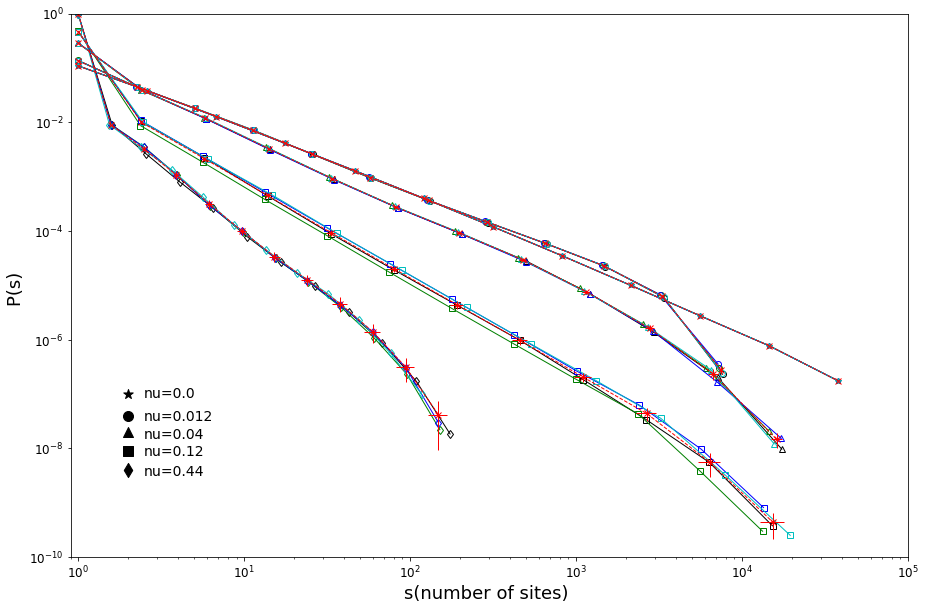

In [161]:


fig=plt.figure(figsize=(15,10))

spec = gridspec.GridSpec(ncols=1, nrows=1)

ax1=fig.add_subplot(spec[0])

s0=1
#markers1=['d']*nbdisip+['s']*nbdisip+['^']*nbdisip+['o']*nbdisip+['+']*nbdisip;
markers1=['d','s','^','o','*']*nbfile
for j in range(nalpha): 
    if(j<nalpha/nbfile):
        symbols1=markers1[j]+'k-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="k", mfc="none") 
    elif (j>=nalpha/nbfile and j<(2*nalpha)/nbfile):
        symbols1=markers1[j]+'g-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="g", mfc="none")
    elif (j>=(2*nalpha)/nbfile and j<(3*nalpha)/nbfile):
        symbols1=markers1[j]+'b-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="b", mfc="none")
    elif (j>=(3*nalpha)/nbfile and j<(4*nalpha)/nbfile):
        symbols1=markers1[j]+'c-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="c", mfc="none")
    
for i in range (nbdisip):
    ax1.errorbar(xmoy[i,:], ymoy[i,:], xerr=xstddev[i,:], yerr=ystddev[i,:], 
                 marker='x', linestyle="--",color="r" ,linewidth=1, markersize=6, mec="r", mfc="none")
    

ax1.scatter(2,10**-7,s=100, marker= "*", color ="k")
ax1.text(2.5,8.5*10**-8, 'nu=0.0', fontsize=14)
ax1.scatter(2,4*10**-8,s=100, marker= "o", color ="k")
ax1.text(2.5,3.2*10**-8, 'nu=0.012', fontsize=14)
ax1.scatter(2,2*10**-8,s=100, marker= "^", color ="k")
ax1.text(2.5,1.5*10**-8, 'nu=0.04', fontsize=14)
ax1.scatter(2,9*10**-9,s=100, marker= "s", color ="k")
ax1.text(2.5,7.5*10**-9, 'nu=0.12', fontsize=14)
ax1.scatter(2,4*10**-9,s=100, marker= "d", color ="k")
ax1.text(2.5,3.2*10**-9, 'nu=0.44', fontsize=14)


    
ax1.axis([9*10**-1, 10**5, 10**-10, 1])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel('s(number of sites) ', fontsize=18)
ax1.set_ylabel('P(s) ', fontsize=18)
ax1.tick_params(labelsize=12) 

"""
ax2=fig.add_subplot(1,2,2)
s1=20

for i in range(nalpha):
    if(i<nalpha/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='k',marker='d')
    elif (i>=nalpha/nbfile and i<(2*nalpha)/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='g',marker='s')
    elif (i>=(2*nalpha)/nbfile and i<(3*nalpha)/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='b',marker='^')
    elif (i>=(3*nalpha)/nbfile and i<(4*nalpha)/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='c',marker='o')

        
ax2.axis([-1, 51, 1.0, 3])
ax2.set_xlabel('Dissipation(%)', fontsize=15, )
ax2.set_ylabel('b', fontsize=15)
ax2.tick_params(labelsize=14)
ax2.grid(True)
"""
plt.show()


(courbe rouge: moyenne des réalisations)

## Variation des distributions avec algoOs en fonction de la seed utilisée 

In [151]:
nbfile=5 #nb of different data
alpha=[14,22,24,247,25]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[100,100,100,1000,100]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 
nbins=12  #nb of points for the fit
lenghtTab=20*317**2 
nbdisip=int(nalpha/nbfile)


path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut'

a='{}/Comparaison/Co76/Seed2/resultsG{}'
a2='{}/Comparaison/Co76/Seed3/resultsG{}'
a3='{}/Comparaison/Co76/Seed4/resultsG{}'
a4='{}/Comparaison/Co76/Seed5/resultsG{}'
a5='{}/Comparaison/Co76/Seed6/resultsG{}'
b='/dist_ava_sites.dat'


filetab=[]
casetab=[]
for i in range(len(alpha)):
    if (i<nalpha/nbfile):
        filetab.append(a.format(brutpath, alpha[i])+b)
        casetab.append(1)
    elif(i>=nalpha/nbfile and i<(2*nalpha)/nbfile):
        filetab.append(a2.format(brutpath, alpha[i])+b)
        casetab.append(1)
    elif(i>=(2*nalpha)/nbfile and i<(3*nalpha)/nbfile) :
        filetab.append(a3.format(brutpath, alpha[i])+b)
        casetab.append(1)
    elif(i>=(3*nalpha)/nbfile and i<(4*nalpha)/nbfile) :
        filetab.append(a4.format(brutpath, alpha[i])+b)
        casetab.append(1)
    elif(i>=(4*nalpha)/nbfile and i<(5*nalpha)/nbfile) :
        filetab.append(a5.format(brutpath, alpha[i])+b)
        casetab.append(1)

In [152]:
ndatafit, ndistloglog, disip, nstat, d1=mainfct(alpha, ncifras, dim, lenghtTab, filetab , casetab, nbfile, nbins)
print("mainfct done")

mainfct done


In [153]:
ndistOs=10**ndistloglog
xmoyOs, ymoyOs=avg(ndistOs, nalpha, nbfile, nbins)
xstddevOs, ystddevOs=stdev(ndistOs, nalpha, nbfile, nbins, xmoyOs, ymoyOs)

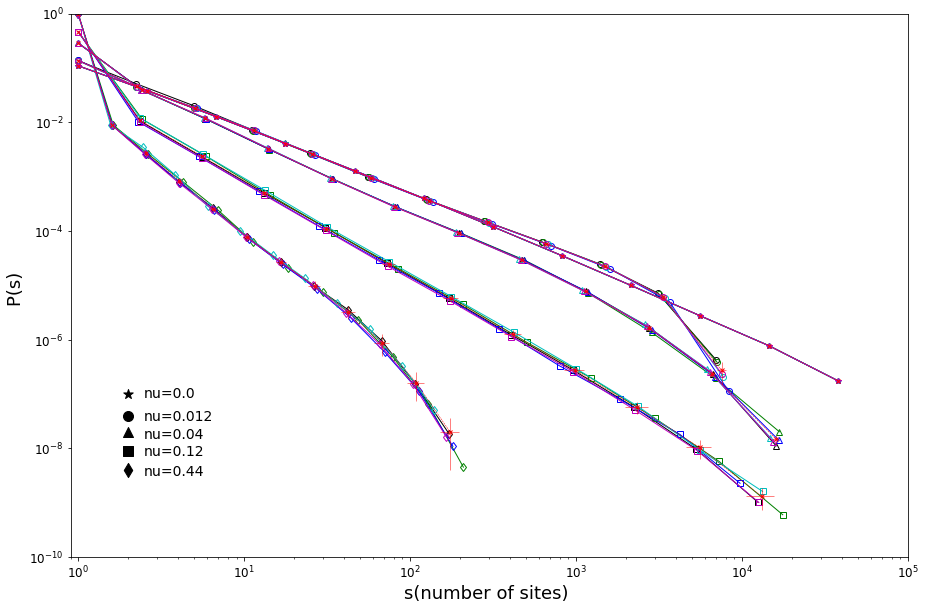

In [154]:


fig=plt.figure(figsize=(15,10))

spec = gridspec.GridSpec(ncols=1, nrows=1)

ax1=fig.add_subplot(spec[0])

s0=1
#markers1=['d']*nbdisip+['s']*nbdisip+['^']*nbdisip+['o']*nbdisip+['+']*nbdisip;
markers1=['d','s','^','o','*']*nbfile

for j in range(nalpha): 
    if(j<nalpha/nbfile):
        symbols1=markers1[j]+'k-'
        ax1.plot(ndistOs[j,:,0],ndistOs[j,:,1],symbols1,linewidth=1,markersize=6,mec="k", mfc="none") 
    elif (j>=nalpha/nbfile and j<(2*nalpha)/nbfile):
        symbols1=markers1[j]+'g-'
        ax1.plot(ndistOs[j,:,0],ndistOs[j,:,1],symbols1,linewidth=1,markersize=6,mec="g", mfc="none")
    elif (j>=(2*nalpha)/nbfile and j<(3*nalpha)/nbfile):
        symbols1=markers1[j]+'b-'
        ax1.plot(ndistOs[j,:,0],ndistOs[j,:,1],symbols1,linewidth=1,markersize=6,mec="b", mfc="none")
    elif (j>=(3*nalpha)/nbfile and j<(4*nalpha)/nbfile):
        symbols1=markers1[j]+'c-'
        ax1.plot(ndistOs[j,:,0],ndistOs[j,:,1],symbols1,linewidth=1,markersize=6,mec="c", mfc="none")
    elif (j>=(4*nalpha)/nbfile and j<(5*nalpha)/nbfile):
        symbols1=markers1[j]+'m-'
        ax1.plot(ndistOs[j,:,0],ndistOs[j,:,1],symbols1,linewidth=1,markersize=6,mec="m", mfc="none")
    
for i in range (nbdisip):
    ax1.errorbar(xmoy[i,:], ymoy[i,:], xerr=xstddevOs[i,:], yerr=ystddevOs[i,:], 
                 marker='x', linestyle="--",color="r" ,linewidth=1, markersize=6, mec="r", mfc="none")
   


ax1.scatter(2,10**-7,s=100, marker= "*", color ="k")
ax1.text(2.5,8.5*10**-8, 'nu=0.0', fontsize=14)
ax1.scatter(2,4*10**-8,s=100, marker= "o", color ="k")
ax1.text(2.5,3.2*10**-8, 'nu=0.012', fontsize=14)
ax1.scatter(2,2*10**-8,s=100, marker= "^", color ="k")
ax1.text(2.5,1.5*10**-8, 'nu=0.04', fontsize=14)
ax1.scatter(2,9*10**-9,s=100, marker= "s", color ="k")
ax1.text(2.5,7.5*10**-9, 'nu=0.12', fontsize=14)
ax1.scatter(2,4*10**-9,s=100, marker= "d", color ="k")
ax1.text(2.5,3.2*10**-9, 'nu=0.44', fontsize=14)


    
ax1.axis([9*10**-1, 10**5, 10**-10, 1])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel('s(number of sites) ', fontsize=18)
ax1.set_ylabel('P(s) ', fontsize=18)
ax1.tick_params(labelsize=12) 

"""
ax2=fig.add_subplot(1,2,2)
s1=20

for i in range(nalpha):
    if(i<nalpha/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='k',marker='d')
    elif (i>=nalpha/nbfile and i<(2*nalpha)/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='g',marker='s')
    elif (i>=(2*nalpha)/nbfile and i<(3*nalpha)/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='b',marker='^')
    elif (i>=(3*nalpha)/nbfile and i<(4*nalpha)/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='c',marker='o')
    elif (i>=(3*nalpha)/nbfile and i<(4*nalpha)/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='m',marker='+')
        
ax2.axis([-1, 51, 1.0, 3])
ax2.set_xlabel('Dissipation(%)', fontsize=15, )
ax2.set_ylabel('b', fontsize=15)
ax2.tick_params(labelsize=14)
ax2.grid(True)
"""

plt.show()


(courbe rouge: moyenne des 5 réalisations)

### Différence de distribution distributions entre le cas algoA et les nouvelles données algoOs (sans l'arrondi). Cas non déterministe


In [163]:
a='{}/Comparaison/Co2{}'
b='/AvalancheA_output.txt'
a2='{}/Comparaison/Co76/Seed3/resultsG{}'
b2='/dist_ava_sites.dat'

filetab=[]
casetab=[]
for i in range(len(alpha)):
    if (i<5):
        filetab.append(a.format(brutpath, i+1)+b)
        casetab.append(0)
    elif(i>=5):
        filetab.append(a2.format(brutpath, alpha[i])+b2)
        casetab.append(1)

In [164]:
ndatafit, ndistloglog, disip, nstat, d1=mainfct(alpha, ncifras, dim, lenghtTab, filetab , casetab, nbfile, nbins)
print("mainfct done")

mainfct done


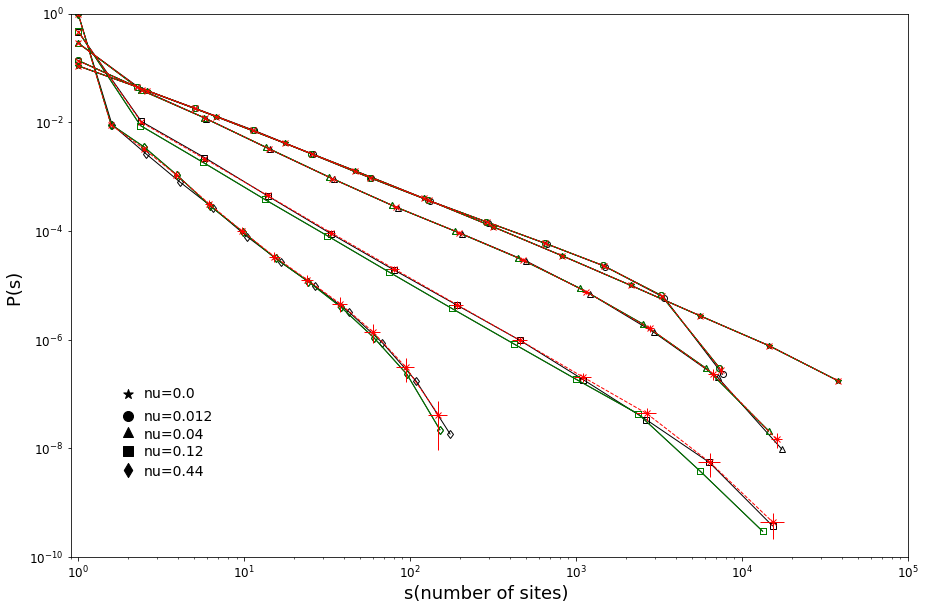

In [166]:
nbfile=2 #nb of different data

alpha=[14,22,24,247,25]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[100,100,100,1000,100]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 

fig=plt.figure(figsize=(15,10))

spec = gridspec.GridSpec(ncols=1, nrows=1)

ax1=fig.add_subplot(spec[0])

s0=1
markers1=['d','s','^','o','*']*nbfile

for j in range(nalpha): 
    
    symbols1=markers1[j]+'k-'
    ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="k", mfc="none") 
    if j>4:
        symbols1=markers1[j]+'g-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="g", mfc="none") 
    #ax1.plot(ndatafit[j,:,0],ndatafit[j,:,1],'r-',linewidth=0.5)
    
for i in range (nbdisip):
    ax1.errorbar(xmoy[i,:], ymoy[i,:], xerr=xstddev[i,:], yerr=ystddev[i,:], 
                 marker='x', linestyle="--",color="r" ,linewidth=1, markersize=6, mec="r", mfc="none")
    

ax1.scatter(2,10**-7,s=100, marker= "*", color ="k")
ax1.text(2.5,8.5*10**-8, 'nu=0.0', fontsize=14)
ax1.scatter(2,4*10**-8,s=100, marker= "o", color ="k")
ax1.text(2.5,3.2*10**-8, 'nu=0.012', fontsize=14)
ax1.scatter(2,2*10**-8,s=100, marker= "^", color ="k")
ax1.text(2.5,1.5*10**-8, 'nu=0.04', fontsize=14)
ax1.scatter(2,9*10**-9,s=100, marker= "s", color ="k")
ax1.text(2.5,7.5*10**-9, 'nu=0.12', fontsize=14)
ax1.scatter(2,4*10**-9,s=100, marker= "d", color ="k")
ax1.text(2.5,3.2*10**-9, 'nu=0.44', fontsize=14)


    
ax1.axis([9*10**-1, 10**5, 10**-10, 1])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel('s(number of sites) ', fontsize=18)
ax1.set_ylabel('P(s) ', fontsize=18)
ax1.tick_params(labelsize=12) 


"""
nstaterror=np.zeros((4,nalpha))
ax2=fig.add_subplot(1,2,2)
s1=20

for i in range(nalpha):
    if (i<5):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='k',marker='o')
    else:
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='g',marker='o')
        
ax2.axis([-1, 51, 1.0, 3])
ax2.set_xlabel('Dissipation(%)', fontsize=15, )
ax2.set_ylabel('b', fontsize=15)
ax2.tick_params(labelsize=14)
ax2.grid(True)
"""
plt.show()

(courbes verte: données algoOs, courbes noire: données algoA, courbes rouge: moyenne des 4 réalisations de AlgoA et déviations standard)

### Cas déterministe

In [171]:
nbfile=2 #nb of different data
alpha=[14,22,24,247, 25]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[100,100,100,1000,10]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 

a='{}/Relaxation/Re1{}'
b='/AvalancheA_output.txt'
a2='{}/Comparaison/Co76/Seed2/resultsG{}'
b2='/dist_ava_sites.dat'

filetab=[]
casetab=[]
for i in range(nalpha):
    if (i<nalpha/nbfile):
        filetab.append(a.format(brutpath, i+6)+b) #je me suis trompé pendant le lancement des prog. Indice 6->10
        casetab.append(0)
    elif(i>=nalpha/nbfile and i<(2*nalpha)/nbfile):
        filetab.append(a2.format(brutpath, alpha[i])+b2)
        casetab.append(1)

In [172]:
ndatafit, ndistloglog, disip, nstat, d1=mainfct(alpha, ncifras, dim, lenghtTab, filetab , casetab, nbfile, nbins)
print("mainfct done")

mainfct done


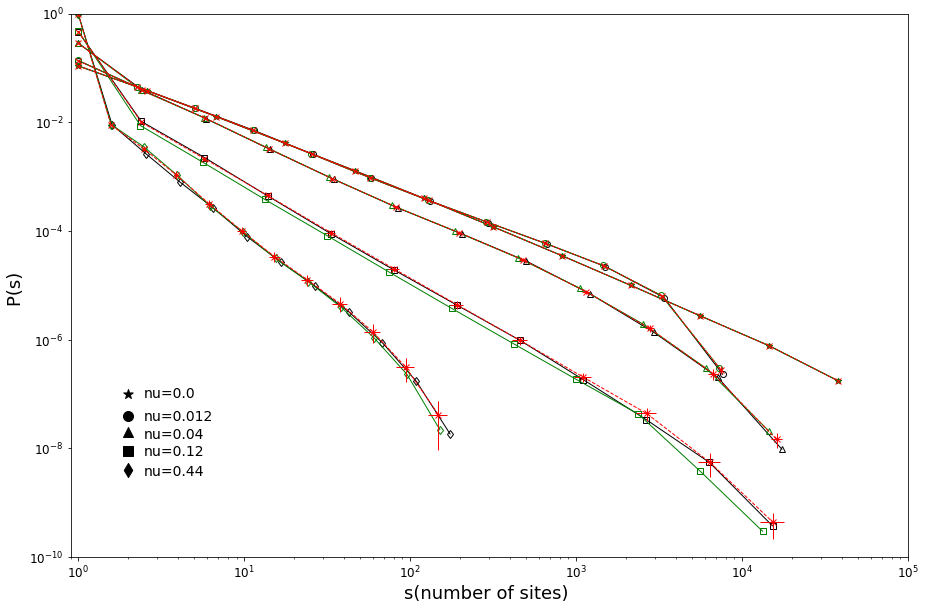

In [175]:
nalpha=len(alpha)

fig=plt.figure(figsize=(15,10))

spec = gridspec.GridSpec(ncols=1, nrows=1)

ax1=fig.add_subplot(spec[0])

s0=1
#markers1=['d']*nbdisip+['s']*nbdisip
markers1=['d','s','^','o','*']*nbfile
for j in range(nalpha): 
    
    if(j<nalpha/nbfile):
        symbols1=markers1[j]+'k-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="k", mfc="none") 
    elif (j>=nalpha/nbfile and j<(2*nalpha)/nbfile):
        symbols1=markers1[j]+'g-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="g", mfc="none")
    ax1.plot(ndatafit[j,:,0],ndatafit[j,:,1],'r-',linewidth=0.5)
    
for i in range (nbdisip):
    ax1.errorbar(xmoy[i,:], ymoy[i,:], xerr=xstddev[i,:], yerr=ystddev[i,:], 
                 marker='x', linestyle="--",color="r" ,linewidth=1, markersize=6, mec="r", mfc="none")
    
    
ax1.scatter(2,10**-7,s=100, marker= "*", color ="k")
ax1.text(2.5,8.5*10**-8, 'nu=0.0', fontsize=14)
ax1.scatter(2,4*10**-8,s=100, marker= "o", color ="k")
ax1.text(2.5,3.2*10**-8, 'nu=0.012', fontsize=14)
ax1.scatter(2,2*10**-8,s=100, marker= "^", color ="k")
ax1.text(2.5,1.5*10**-8, 'nu=0.04', fontsize=14)
ax1.scatter(2,9*10**-9,s=100, marker= "s", color ="k")
ax1.text(2.5,7.5*10**-9, 'nu=0.12', fontsize=14)
ax1.scatter(2,4*10**-9,s=100, marker= "d", color ="k")
ax1.text(2.5,3.2*10**-9, 'nu=0.44', fontsize=14)

    
ax1.axis([9*10**-1, 10**5, 10**-10, 1])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel('s(number of sites) ', fontsize=18)
ax1.set_ylabel('P(s) ', fontsize=18)
ax1.tick_params(labelsize=12) 


"""
ax2=fig.add_subplot(1,2,2)
s1=20

for i in range(nalpha):
    if(i<nalpha/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='k',marker='d')
    elif (i>=nalpha/nbfile and i<(2*nalpha)/nbfile):
        ax2.scatter(disip[i],(-1)*nstat[0,i],c='g',marker='s')
        
ax2.axis([-1, 51, 1.0, 3])
ax2.set_xlabel('Dissipation(%)', fontsize=15, )
ax2.set_ylabel('b', fontsize=15)
ax2.tick_params(labelsize=14)
ax2.grid(True)
"""
plt.show()

(courbes vertes: données algoOs, courbes noires: données agoA, courbes bleues: moyenne des 4 réalisations de algoA et deviations standards)

# Conclusion:
- On note un écart de statistique entre algoA et algoOs mais cela est causé par la différence dans l'incrémentation des forces. Mais l'écart entre les deux distributions reste dans la déviation standard obtenu avec les 4 seeds. Celon cette source : https://books.google.fr/books?id=uXJC2C2sRbIC&pg=PA40&redir_esc=y#v=onepage&q&f=false p.40, l'une des règles fondamentales des automates cellulaires déterministe est que tout le système doit être mise à jour en même temps. Ce qui donnerait raison au code d'Osvanny

# Mise à jour du code actuel pour passer en automate synchrone

### AlgoA

In [29]:
datapath=f"{brutpath}/Comparaison/Co"
dataOs=f"{datapath}81/ava_outputOsvanny2.txt"
dataA=f"{datapath}141/AvalancheA_output.txt"
L=316
avalOs=np.loadtxt(dataOs)
avalA=np.loadtxt(dataA)

diff=0
for i in range(len(avalA)):
    x1,x2=coorno(avalA[i][1]) 
    if (avalOs[i][1]!=x1 and avalOs[i][2]!=x2 and avalOs[i][0]!=avalA[i][1]):
        print(f"i:{i}, aval0s: size={avalOs[i][0]}, x1={avalOs[i][1]},x2={avalOs[i][2]}\n")
        print(f"i:{i}, avalA: size={avalA[i][1]}, x1={x1},x2={x2}\n")
        diff=1

if (diff==1):
    print("Des différences de tailles d'avalanches sont visibles\n")
else:
    print("Aucune différence\n")

Aucune différence



Après mise à jour de algoA, la 1000ème avalanche du code actuelle est identique à celle du code d'Osvanny

### AlgoB

In [3]:
datapath=f"{brutpath}/Comparaison/Co"
dataOs=f"{datapath}81/ava_outputOsvanny2.txt"
dataB=f"{datapath}161/AvalancheB_output.txt"
L=316
avalOs=np.loadtxt(dataOs)
avalB=np.loadtxt(dataB)

diff=0
for i in range(len(avalB)):
    x1,x2=coorno(avalB[i][1]) 
    if (avalOs[i][1]!=x1 and avalOs[i][2]!=x2 and avalOs[i][0]!=avalB[i][1]):
        print(f"i:{i}, aval0s: size={avalOs[i][0]}, x1={avalOs[i][1]},x2={avalOs[i][2]}\n")
        print(f"i:{i}, avalB: size={avalB[i][1]}, x1={x1},x2={x2}\n")
        diff=1

if (diff==1):
    print("Des différences de tailles d'avalanches sont visibles\n")
else:
    print("Aucune différence\n")

Aucune différence



Après mise à jour de algoB, la 1000ème avalanche du code actuelle est identique à celle du code d'Osvanny

Les paramètres de base du code initial de François ont également été testés pour s'assurer que les trois algorithmes donnent bien les mêmes configurations de site pour la 1000ème avalanche. Le modèle utilisé est :

Paramètres initiaux:
- L= 256
- nu = 0.0
- Dimention système= 2
- Nombre d'event = 1000
- Initialisation des forces à 0.
- Initialisation des threshold entre 0.9 et 1.1

Quand un site topple:
- Force réinitialisé à 0;
- Threshold réinitialisé à une valeur entre 0.9 et 1.1
- Distribution de la force du site (F_site): Les 4 voisins recoivent F_voisin+=F_voisin+F_site*alpha avec alpha=(1-nu)*0.25 (ici 0.25)


Les 3 algorithmes donnent la même 1000ème avalanche

#### Verification de la distribution dans le cas de OFC classique

In [6]:
nbfile=3 #nb of different data
alpha=[14,22,24,247, 25]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[100,100,100,1000,100]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 
nbins=12  #nb of points for the fit
lenghtTab=20*256**2 
nbdisip=int(nalpha/nbfile)


path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut/Relaxation'

a='{}/Re7{}'
a2='{}/Re8{}'
a3='{}/Re9{}'

b='/AvalancheB_output.txt'


filetab=[]
casetab=[]
for i in range(len(alpha)):
    if (i<nalpha/nbfile):
        filetab.append(a.format(brutpath, i+1)+b)
        casetab.append(0)
    elif(i>=nalpha/nbfile and i<(2*nalpha)/nbfile):
        filetab.append(a2.format(brutpath, int(i+1-(nalpha/nbfile)))+b)
        casetab.append(0)
    elif(i>=(2*nalpha)/nbfile and i<(3*nalpha)/nbfile) :
        filetab.append(a3.format(brutpath, int(i+1-((2*nalpha)/nbfile)))+b)
        casetab.append(0)
        

In [7]:
ndatafit, ndistloglog, disip, nstat, d1=mainfct(alpha, ncifras, dim, lenghtTab, filetab , casetab, nbfile, nbins)
print("mainfct done")

mainfct done


In [8]:
ndist=10**ndistloglog
xmoy, ymoy=avg(ndist, nalpha, nbfile, nbins)
xstddev, ystddev=stdev(ndist, nalpha, nbfile, nbins, xmoy, ymoy)

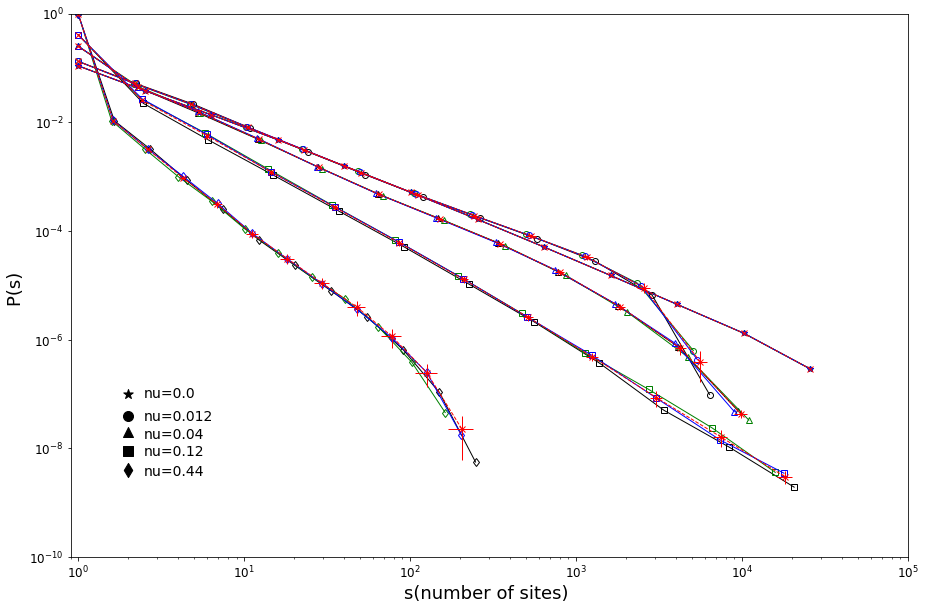

In [9]:


fig=plt.figure(figsize=(15,10))

spec = gridspec.GridSpec(ncols=1, nrows=1)

ax1=fig.add_subplot(spec[0])

s0=1
markers1=['d','s','^','o','*']*nbfile
for j in range(nalpha): 
    if(j<nalpha/nbfile):
        symbols1=markers1[j]+'k-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="k", mfc="none") 
    elif (j>=nalpha/nbfile and j<(2*nalpha)/nbfile):
        symbols1=markers1[j]+'g-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="g", mfc="none")
    elif (j>=(2*nalpha)/nbfile and j<(3*nalpha)/nbfile):
        symbols1=markers1[j]+'b-'
        ax1.plot(ndist[j,:,0],ndist[j,:,1],symbols1,linewidth=1,markersize=6,mec="b", mfc="none")

for i in range (nbdisip):
    ax1.errorbar(xmoy[i,:], ymoy[i,:], xerr=xstddev[i,:], yerr=ystddev[i,:], 
                 marker='x', linestyle="--",color="r" ,linewidth=1, markersize=6, mec="r", mfc="none")
    

ax1.scatter(2,10**-7,s=100, marker= "*", color ="k")
ax1.text(2.5,8.5*10**-8, 'nu=0.0', fontsize=14)
ax1.scatter(2,4*10**-8,s=100, marker= "o", color ="k")
ax1.text(2.5,3.2*10**-8, 'nu=0.012', fontsize=14)
ax1.scatter(2,2*10**-8,s=100, marker= "^", color ="k")
ax1.text(2.5,1.5*10**-8, 'nu=0.04', fontsize=14)
ax1.scatter(2,9*10**-9,s=100, marker= "s", color ="k")
ax1.text(2.5,7.5*10**-9, 'nu=0.12', fontsize=14)
ax1.scatter(2,4*10**-9,s=100, marker= "d", color ="k")
ax1.text(2.5,3.2*10**-9, 'nu=0.44', fontsize=14)


    
ax1.axis([9*10**-1, 10**5, 10**-10, 1])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel('s(number of sites) ', fontsize=18)
ax1.set_ylabel('P(s) ', fontsize=18)
ax1.tick_params(labelsize=12) 

plt.show()


### Quel est la taille max dune avalache si elle est dans les 90,95,99,99.9 % des avalanches
Dans le cas OFC classique

In [2]:
nbfile=3 #nb of different data
alpha=[14,22,24,247, 25]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[100,100,100,1000,100]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 
nbins=12  #nb of points for the fit
lenghtTab=20*256**2 
nbdisip=int(nalpha/nbfile)


path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut/Relaxation'

a='{}/Re7{}'
a2='{}/Re8{}'
a3='{}/Re9{}'

b='/AvalancheB_output.txt'

filetab=[]
casetab=[]
for i in range(len(alpha)):
    if (i<nalpha/nbfile):
        filetab.append(a.format(brutpath, i+1)+b)
        casetab.append(0)
    elif(i>=nalpha/nbfile and i<(2*nalpha)/nbfile):
        filetab.append(a2.format(brutpath, int(i+1-(nalpha/nbfile)))+b)
        casetab.append(0)
    elif(i>=(2*nalpha)/nbfile and i<(3*nalpha)/nbfile) :
        filetab.append(a3.format(brutpath, int(i+1-((2*nalpha)/nbfile)))+b)
        casetab.append(0)

In [3]:
ndatafit, ndistloglog, disip, nstat, d1=mainfct(alpha, ncifras, dim, lenghtTab, filetab , casetab, nbfile, nbins)
print("mainfct done")

mainfct done


In [6]:
L = 256
nbava = 1e7
data = np.zeros((L*L, int(nalpha/nbfile)))
j2 = 0

for j in range(nalpha):
    if(j2 == 5): 
        j2 = 0
    for i in range(1,len(data)):
        if(d1[i][j] > 1e7 or d1[i][j] < 0):
            print(f"({i}, {j}): {d1[i][j]}")
        data[i][j2] +=  d1[i][j]
    j2 += 1

data = data/nbfile

nb = 0
for i in range(len(data)):
    nb += data[i][1]

print(f"System size = {L*L}")

n=np.zeros(5)
for j in range(len(data[0])):
    c = -1
    print(f"Dissipation = {1 - (alpha[j]*4/ncifras[j]): .3f}")
    for i in range(len(data)):
        try:
            n[j] += data[i][j]
        except ValueError:
            n[j] += 0
        if(n[j]*100/nbava >90 and c == -1):
            print(f"90% of the avalanches are smaller or equal to size={i}")
            c += 1
        if(n[j]*100/nbava >95 and c == 0):
            print(f"95% of the avalanches are smaller or equal to size={i}")
            c += 1
        if(n[j]*100/nbava >99 and c == 1):
            print(f"99% of the avalanches are smaller or equal to size={i}")
            c += 1
        if(n[j]*100/nbava >99.9 and c == 2):
            print(f"99.9% of the avalanches are smaller or equal to size={i}")
            c += 1
            

System size = 65536
Dissipation =  0.440
90% of the avalanches are smaller or equal to size=1
95% of the avalanches are smaller or equal to size=1
99% of the avalanches are smaller or equal to size=3
99.9% of the avalanches are smaller or equal to size=14
Dissipation =  0.120
90% of the avalanches are smaller or equal to size=6
95% of the avalanches are smaller or equal to size=16
99% of the avalanches are smaller or equal to size=142
99.9% of the avalanches are smaller or equal to size=1877
Dissipation =  0.040
90% of the avalanches are smaller or equal to size=124
95% of the avalanches are smaller or equal to size=446
99% of the avalanches are smaller or equal to size=2423
99.9% of the avalanches are smaller or equal to size=8187
Dissipation =  0.012
90% of the avalanches are smaller or equal to size=794
95% of the avalanches are smaller or equal to size=1766
99% of the avalanches are smaller or equal to size=4045
99.9% of the avalanches are smaller or equal to size=6243
Dissipation 

Dans le cas OFC random threshold

In [11]:
nbfile=3 #nb of different data
alpha=[14,22,24,247, 25]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[100,100,100,1000,100]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 
nbins=12  #nb of points for the fit
lenghtTab=20*256**2 
nbdisip=int(nalpha/nbfile)


path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut/Comparaison'

a='{}/Co19{}'
a2='{}/Co20{}'
a3='{}/Co21{}'

b='/AvalancheB_output.txt'

filetab=[]
casetab=[]
for i in range(len(alpha)):
    if (i<nalpha/nbfile):
        filetab.append(a.format(brutpath, i+1)+b)
        casetab.append(0)
    elif(i>=nalpha/nbfile and i<(2*nalpha)/nbfile):
        filetab.append(a2.format(brutpath, int(i+1-(nalpha/nbfile)))+b)
        casetab.append(0)
    elif(i>=(2*nalpha)/nbfile and i<(3*nalpha)/nbfile) :
        filetab.append(a3.format(brutpath, int(i+1-((2*nalpha)/nbfile)))+b)
        casetab.append(0)

In [12]:
ndatafit, ndistloglog, disip, nstat, d1=mainfct(alpha, ncifras, dim, lenghtTab, filetab , casetab, nbfile, nbins)
print("mainfct done")

mainfct done


In [13]:
L = 256
nbava = 1e7
data = np.zeros((L*L, int(nalpha/nbfile)))
j2 = 0

for j in range(nalpha):
    if(j2 == 5): 
        j2 = 0
    for i in range(1,len(data)):
        if(d1[i][j] > 1e7 or d1[i][j] < 0):
            print(f"({i}, {j}): {d1[i][j]}")
        data[i][j2] +=  d1[i][j]
    j2 += 1

data = data/nbfile

nb = 0
for i in range(len(data)):
    nb += data[i][1]

print(f"System size = {L*L}")

n=np.zeros(5)
for j in range(len(data[0])):
    c = -1
    print(f"Dissipation = {1 - (alpha[j]*4/ncifras[j]): .3f}")
    for i in range(len(data)):
        try:
            n[j] += data[i][j]
        except ValueError:
            n[j] += 0
        if(n[j]*100/nbava >90 and c == -1):
            print(f"90% of the avalanches are smaller or equal to size={i}")
            c += 1
        if(n[j]*100/nbava >95 and c == 0):
            print(f"95% of the avalanches are smaller or equal to size={i}")
            c += 1
        if(n[j]*100/nbava >99 and c == 1):
            print(f"99% of the avalanches are smaller or equal to size={i}")
            c += 1
        if(n[j]*100/nbava >99.9 and c == 2):
            print(f"99.9% of the avalanches are smaller or equal to size={i}")
            c += 1
            

System size = 65536
Dissipation =  0.440
90% of the avalanches are smaller or equal to size=3
95% of the avalanches are smaller or equal to size=5
99% of the avalanches are smaller or equal to size=8
99.9% of the avalanches are smaller or equal to size=13
Dissipation =  0.120
90% of the avalanches are smaller or equal to size=35
95% of the avalanches are smaller or equal to size=58
99% of the avalanches are smaller or equal to size=162
99.9% of the avalanches are smaller or equal to size=672
Dissipation =  0.040
90% of the avalanches are smaller or equal to size=64
95% of the avalanches are smaller or equal to size=134
99% of the avalanches are smaller or equal to size=548
99.9% of the avalanches are smaller or equal to size=2240
Dissipation =  0.012
90% of the avalanches are smaller or equal to size=563
95% of the avalanches are smaller or equal to size=1309
99% of the avalanches are smaller or equal to size=3520
99.9% of the avalanches are smaller or equal to size=5961
Dissipation = 